This is an introduction to a the Semi-supervised Learning approach.

That situation where we have small amounts of labeled data, and we need to train our model with it, so in order to achieve a better and more robust model, we look for more information let's say images, but we need to label each image in order to make this new information meaningful for our model, this is effective for those cases where the amount of data is small, but for large amounts of data it becomes extremely tedious and time and resources consuming process. Here is were semi-supervised learning (SSL for simplicity) approach becomes relevant; the unlabeled data is used to create a more accurate boundary between the positive and negative data,  without the painfull process of manually labeling each entry on the dataset one by one.

Self training is the same as pseudo-label training?? MAYBE
XGBRegressor
There's some different approaches under  

making use of the supervised approach on the already labeled data to train the model, and it's output to label the remaining unlabeled data.


Some advantages of this approach are:

+ Less cost associated with time spent in labeling process and resources to achieve that, in terms of expertise, tools and computational power.
+ More unlabeled data, inhibit the biased learning, which improves accuracy during training process.



PSEUDO-LABELING

Making use of the supervised approach on the already labeled data to train the model, and it's output to label the remaining unlabeled data.

1) train the algorithm with the labeled portion of the data set.

2) Label the unlabeled data with the output of predictions done by the systems.

For this example a data set from Kaggle's competittion Titanic: Machine Learning from Disaster has been used, and can be downloaded from this link: https://www.kaggle.com/c/titanic/data

The purpose of that competittion was to predict values on Survived column for each PassengerId in test dataset.

In [54]:
#step 1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


Import the dataset, for this case we will use the Titanic dataset from Kaggle's competition

In [55]:
df_train= pd.read_csv(r'C:\Users\dengo\Downloads\titanic\train.csv')
df_test = pd.read_csv(r'C:\Users\dengo\Downloads\titanic\test.csv')

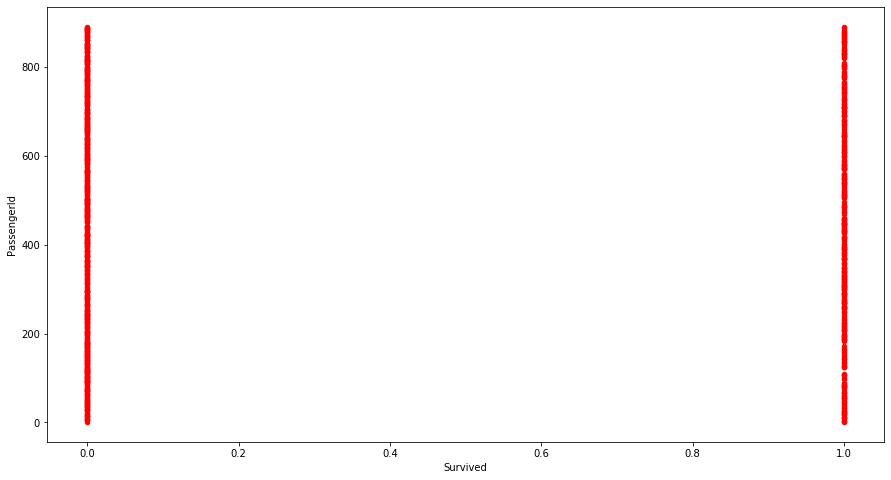

In [78]:
df_train.plot(kind='scatter',x='Survived',y='PassengerId',color='red')
#df_test.plot(kind='scatter',x='PassengerId',y='Survived',color='red')
plt.rcParams['figure.figsize'] =  (15,8)
plt.show()

Change all NaN values for ceros.

In [79]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [80]:
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,155,1,33,1,0,720,20,0,3
1,2,1,0,286,0,58,1,0,816,237,107,1
2,3,1,2,523,0,40,0,0,914,50,0,3
3,4,1,0,422,0,54,1,0,65,217,71,3
4,5,0,2,22,1,54,0,0,649,52,0,3
5,6,0,2,818,1,0,0,0,373,60,0,2
6,7,0,0,767,1,77,0,0,109,214,164,3
7,8,0,2,914,1,9,3,1,541,143,0,3
8,9,1,2,605,0,42,0,2,477,87,0,3
9,10,1,1,847,0,22,1,0,174,177,0,1


Please note that the test set has not the Survived column, and the purpose for this model is to try to predict if a passenger survived or perished one by one.

df2_train = df_train
dfx=df2_train['PassengerId'].append(df_test['PassengerId'], ignore_index = True) 
#dfx=dfx.insert(1, column='Survived', value=df_train['Survived'])

dfx=dfx(columns = ['PassengerId'])

In [81]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,2,638,1,53,0,0,376,43,0,2
1,893,2,1266,0,70,1,0,582,12,0,3
2,894,1,837,1,87,0,0,184,77,0,2
3,895,2,1278,1,42,0,0,366,63,0,3
4,896,2,543,0,33,1,1,338,93,0,3


The following procedure, is intended to transform the data that is originally in form of strings to a quatizable form, so it is converted to integers, for both train andd test datasets.

In [82]:
features = df_train.columns[2:]

for column_name in features:
    label_encoder = LabelEncoder() 
    
    # Obtain the column values from training and test datasets
    df_train_column_values = list(df_train[column_name].values)
    df_test_column_values = list(df_test[column_name].values)

    
    # Fit the label encoder
    label_encoder.fit(df_train_column_values + df_test_column_values)
    
    # Transform the feature
    df_train[column_name] = label_encoder.transform(df_train_column_values)
    df_test[column_name] = label_encoder.transform(df_test_column_values)

all qualitative values are transformed to numerical values.

In [83]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,2,638,1,53,0,0,376,43,0,2
1,893,2,1266,0,70,1,0,582,12,0,3
2,894,1,837,1,87,0,0,184,77,0,2
3,895,2,1278,1,42,0,0,366,63,0,3
4,896,2,543,0,33,1,1,338,93,0,3


Survived is the column that is missing in Test dataset, and we want to create that column for that dataset and predict survivors by passenger ID 

In [84]:
target = 'Survived'
X_train, X_test = df_train[features], df_test[features]
y_train = df_train[target]


In [85]:
#df_train.scatter(Xx, Xy, c=map(lambda c: 0.3 * c + 0.5, Y), s=50, alpha=0.75)

The next class is in charge of creating/assigning the labels, create a new dataset with the pseudo labeled information and predict information based on the target 

In [86]:
class PseudoLabeler(BaseEstimator, RegressorMixin):
#Sci-kit learn wrapper for creating pseudo-lebeled estimators.
 

    def __init__(self, model, unlabled_data, features, target, sample_rate=0.2, seed=42):
        '''
        @sample_rate - percent of samples used as pseudo-labelled data
        from the unlabelled dataset
        '''
        assert sample_rate <= 1.0, 'Sample_rate should be between 0.0 and 1.0.'

        self.sample_rate = sample_rate
        self.seed = seed
        self.model = model
        self.model.seed = seed

        self.unlabled_data = unlabled_data
        self.features = features
        self.target = target

    def get_params(self, deep=True):
        return {
            "sample_rate": self.sample_rate,
            "seed": self.seed,
            "model": self.model,
            "unlabled_data": self.unlabled_data,
            "features": self.features,
            "target": self.target
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, y):
        '''
        Fit the data using pseudo labeling.
        '''
        if self.sample_rate > 0.0:

            augemented_train = self.__create_augmented_train(X, y)
            self.model.fit(
                augemented_train[self.features],
                augemented_train[self.target]
            )
        else:
            self.model.fit(X,y)
            
        return self

    def __create_augmented_train(self, X, y):
        num_of_samples = int(len(self.unlabled_data) * self.sample_rate)
        
        # Train the model and creat the pseudo-labels
        self.model.fit(X, y)
        pseudo_labels = self.model.predict(self.unlabled_data[self.features])
        
        # Add the pseudo-labels to the test set
        augmented_test = self.unlabled_data.copy(deep=True)
        augmented_test[self.target] = pseudo_labels
        
        # Take a subset of the test set with pseudo-labels and append in onto
        # the training set
        sampled_test = augmented_test.sample(n=num_of_samples)
        temp_train = pd.concat([X, y], axis=1)
        augemented_train = pd.concat([sampled_test, temp_train])

        return shuffle(augemented_train)
        
    def predict(self, X):
        return self.model.predict(X)
    
    def get_model_name(self):
        return self.model.__class__.__name__



In [87]:
model= PseudoLabeler (
        GradientBoostingRegressor(),
        df_test,
        features,
        target, 
        sample_rate = 0.5
    )


model.fit(X_train, y_train)
prediction = model.predict(X_test)

score_cv = cross_val_score(model, X_train, y_train, scoring='r2', n_jobs=8)
score_description = "R2: %0.4f (+/- %0.4f)" % (score_cv.mean(), score_cv.std() * 2)
print('{model:25}  {score_cv}'.format(
    model=model.__class__.__name__,
   # num_folds=num_folds,
    score_cv=score_description
    ))


C:\Users\dengo\Miniconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\dengo\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


PseudoLabeler              R2: 0.4369 (+/- 0.1522)


Assuming values above 0.41 as survived (1), a simple manipulation has been done to the data in order to be able to visualize it better, but a better understanding of the values obtained is necessary to obtain better results.

In [88]:
pred_length = len(prediction)

for i in range(pred_length):
    if prediction[i] >= 0.42:
        prediction[i] = 1
    else: prediction[i] = 0
        


Save the result

In [89]:
result = pd.DataFrame(data = prediction, columns = [ 'Survived'])
result.insert(0, column='PassengerId', value=df_test['PassengerId'])

result.to_csv('pseudo-labelling.csv', index='False')


The purpose of this example is to see if we can find a way to label the unknown data (test), so the result shows what was predicted using the Pseudolabeler function, for this case if the passenger with certain Id survided or perished

In [90]:
result

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
5,897,0.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0


Lets plot the results and visualize the results

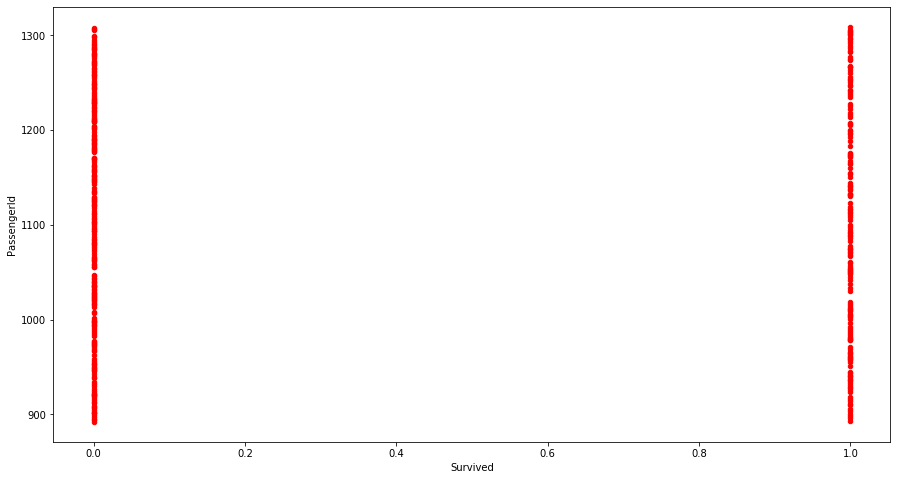

In [91]:
result.plot(kind='scatter',x='Survived',y='PassengerId',color='red')
plt.show()